In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import SaltRemover as sr
remover = sr.SaltRemover()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
df1 = pd.read_csv('final_total.csv', sep=' ', na_values=['na'])
df1 = df1.dropna(ignore_index=True)
df1

,CHEMBLID,smiles,ido_ic50,tdo_ic50
0,CHEMBL1098875,O=C1c2cc(F)ccc2-n2c1nc1ccccc1c2=O,23.0,60.0
1,CHEMBL1209728,Cc1c(Br)oc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,10000.0,10000.0
2,CHEMBL1276265,O=C1c2ccc(Cl)cc2-n2c1nc1ccccc1c2=O,183.0,224200.0
3,CHEMBL1346056,Oc1ccccc1-c1nc2c3ccccc3c3ccccc3c2[nH]1,11790.0,12250.0
4,CHEMBL139935,O=[N+]([O-])c1cc(F)c2cccnc2c1O,14610.0,30230.0
...,...,...,...,...
755,CHEMBL5221020,O[C@@H]1CCCC[C@H]1CNc1c(Br)ccc2[nH]ncc12,1230.0,11240.0
756,CHEMBL5221102,Brc1cc(NC[C@H]2CCCN2)c2cn[nH]c2c1,56450.0,7450.0
757,CHEMBL578036,CC1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(CO)coc2-1,10000.0,450.0
758,CHEMBL584991,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1,50.0,10000.0


In [5]:
df1.loc[:, 'ido_ic50'] = (np.log10((df1.loc[:, 'ido_ic50'])*10**(-9)))*(-1)
df1.loc[:, 'tdo_ic50'] = (np.log10((df1.loc[:, 'tdo_ic50'])*10**(-9)))*(-1)

In [6]:
df2 = df1.loc[:, ['ido_ic50', 'tdo_ic50']]
df2

,ido_ic50,tdo_ic50
0,7.638272,7.221849
1,5.000000,5.000000
2,6.737549,3.649364
3,4.928486,4.911864
4,4.835350,4.519562
...,...,...
755,5.910095,4.949234
756,4.248336,5.127844
757,5.000000,6.346787
758,7.301030,5.000000


In [7]:
for i in range(len(df2)):
    if df2['ido_ic50'].values[i] >= 6.15:
        df2.loc[i, ['ido_ic50']] = 1
    else:
        df2.loc[i, ['ido_ic50']] = 0

In [8]:
for i in range(len(df2)):
    if df2['tdo_ic50'].values[i] >= 6.0:
        df2.loc[i, ['tdo_ic50']] = 1
    else:
        df2.loc[i, ['tdo_ic50']] = 0

In [9]:
df2

,ido_ic50,tdo_ic50
0,1.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
755,0.0,0.0
756,0.0,0.0
757,0.0,1.0
758,1.0,0.0


In [10]:
newcol = []
for i in range(len(df2)):
    if df2['ido_ic50'].values[i] == 1.0 and df2['tdo_ic50'].values[i] == 1.0:
        newcol.append('AA')
    elif df2['ido_ic50'].values[i] == 0.0 and df2['tdo_ic50'].values[i] == 0.0:
        newcol.append('II')
    elif df2['ido_ic50'].values[i] == 0.0 and df2['tdo_ic50'].values[i] == 1.0:
        newcol.append('IA')
    else:
        newcol.append('AI')

In [11]:
target = pd.DataFrame(data=newcol, columns=['ido_tdo'])
target

,ido_tdo
0,AA
1,II
2,AI
3,II
4,II
...,...
755,II
756,II
757,IA
758,AI


In [12]:
encoder = LabelEncoder()
y_label = encoder.fit_transform(target['ido_tdo'])

In [13]:
y_label

array([0, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3,
       3, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 3, 0, 0,
       1, 3, 0, 2, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0,
       3, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 3, 0, 0, 3,
       0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 3, 1, 1, 2, 0, 3, 3, 0, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 3, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 3, 0, 3, 3, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 2, 0, 1, 3, 1, 0, 0, 3, 3, 0,
       0, 2, 1, 0, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3, 3,

In [14]:
mols = []
for i in range(len(df1)):
    try:
        mol_i = Chem.MolFromSmiles(df1['smiles'][i])
        if mol_i is None:
            print(f"[WARNING] Invalid SMILES at index {i}, skipping.")
            mols.append(None)  # Maintain indexing for multiprocessing
            continue
        mol_i = remover.StripMol(mol_i, dontRemoveEverything=True)
        mols.append(mol_i)
    except Exception as e:
        print(e)
len(mols)

760

In [15]:
#Morgan Fingerprints:
fpgen2 = AllChem.GetMorganGenerator(fpSize=1024)
i = 0
l2 = np.zeros((1, 1024), dtype='uint8')
for mol in mols:
    fp2 = fpgen2.GetFingerprintAsNumPy(mols[i])
    l2 = np.vstack((l2, fp2))
    i += 1
MFPs = l2[1:, :]
MFPs.shape

(760, 1024)

In [16]:
FP_df = pd.DataFrame(MFPs)
FP_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
756,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
757,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x = FP_df.values

In [19]:
from sklearn.decomposition import PCA

In [20]:
reduced_data_pca = PCA(n_components=2, random_state=42).fit_transform(x)

In [20]:
from sklearn.manifold import TSNE

In [21]:
reduced_data_tsne = TSNE(n_components=2, random_state=42).fit_transform(x)

In [23]:
reduced_data_tsne.shape

(760, 2)

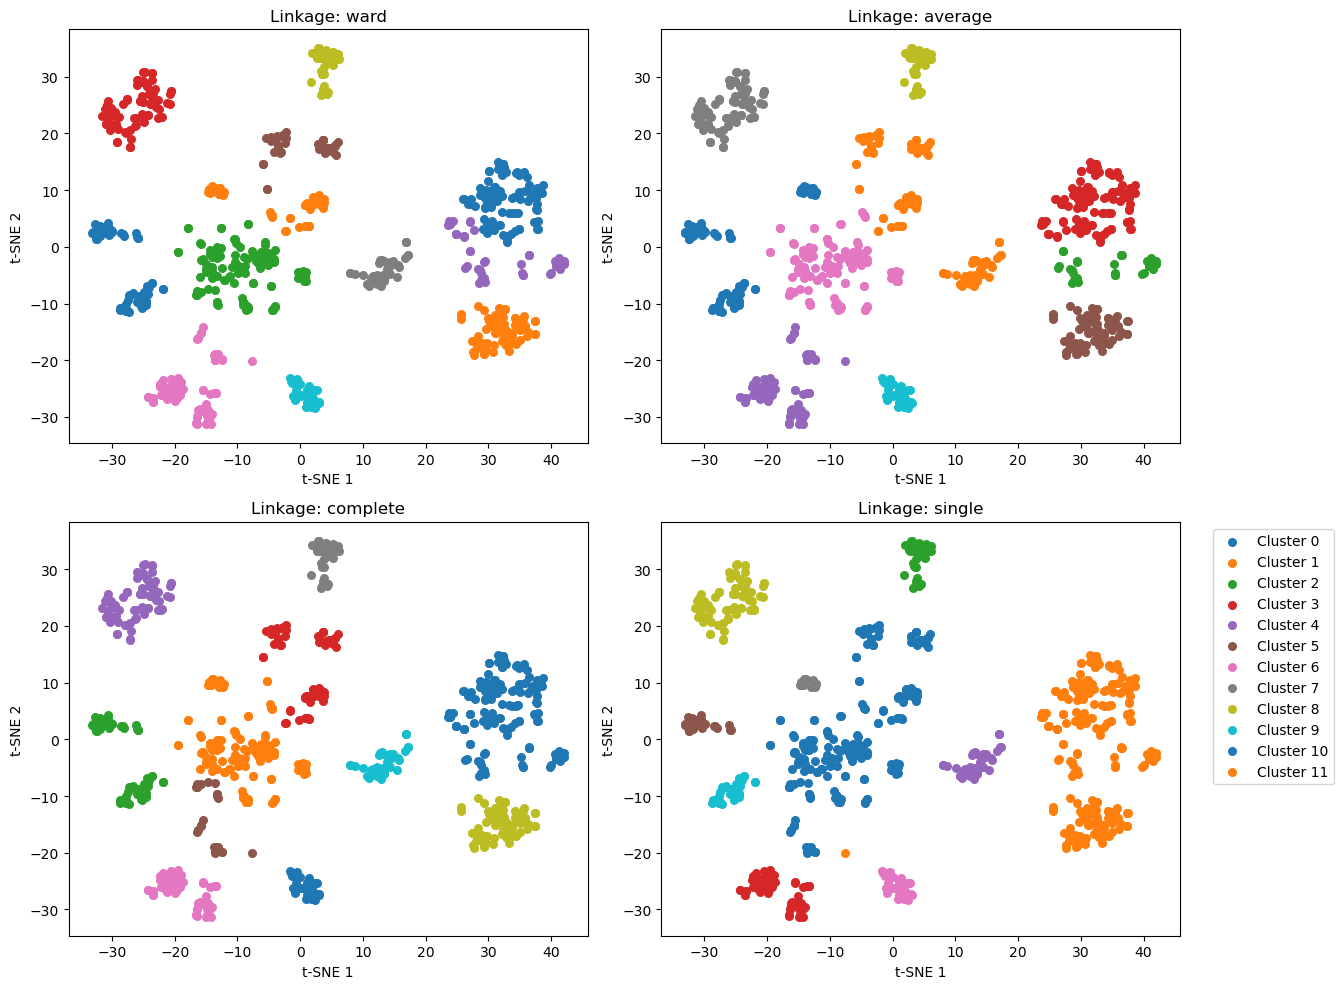

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# --- Step 1: Assume you already have your t-SNE reduced data ---
# X_tsne is a numpy array of shape (760, 2)
# Example: X_tsne = np.load("tsne_data.npy")

X = reduced_data_tsne

# --- Step 2: Define linkage methods ---
linkage_methods = ["ward", "average", "complete", "single"]
num_clusters = 12  # adjust based on your dataset

# --- Step 3: Run clustering and visualize ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, method in enumerate(linkage_methods):
    hc = AgglomerativeClustering(n_clusters=num_clusters, linkage=method)
    labels = hc.fit_predict(X)
    
    # Plot clusters in t-SNE space
    ax = axes[i]
    for cluster in np.unique(labels):
        ax.scatter(
            X[labels == cluster, 0],
            X[labels == cluster, 1],
            label=f'Cluster {cluster}', s=30
        )
    ax.set_title(f"Linkage: {method}")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


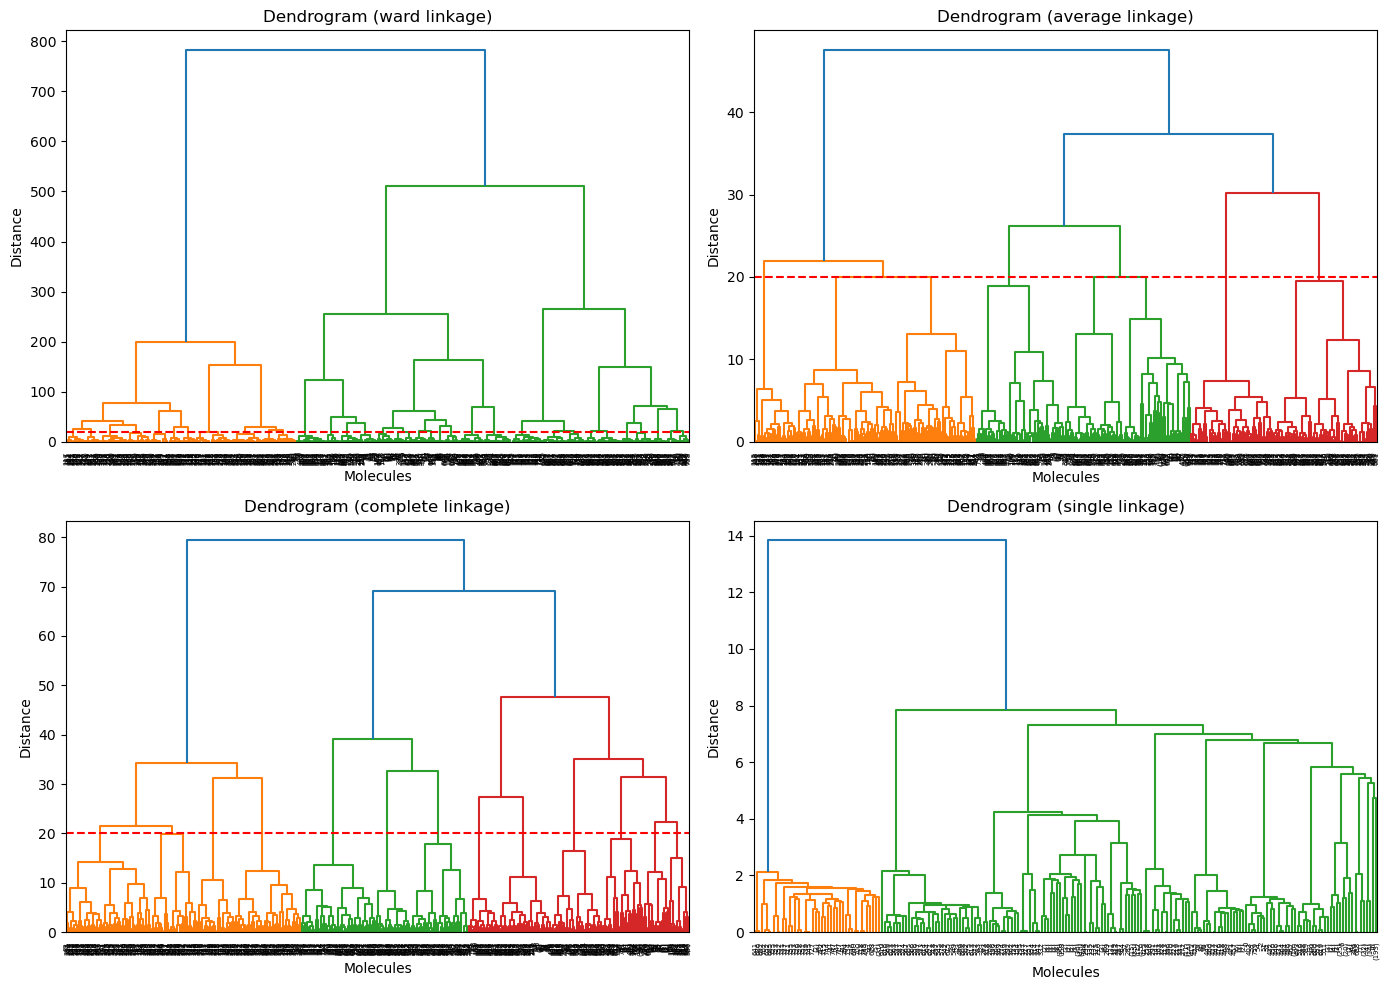

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# --- Step 1: Assume you already have your t-SNE reduced data ---
# X_tsne is a numpy array of shape (760, 2)
# Example: X_tsne = np.load("tsne_data.npy")

X = reduced_data_tsne

# --- Step 2: Define linkage methods ---
linkage_methods = ["ward", "average", "complete", "single"]

# --- Step 3: Set cut-off threshold ---
cutoff = 20.0  # adjust based on your dataset

# --- Step 4: Plot dendrograms with cut-off line ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, method in enumerate(linkage_methods):
    linked = linkage(X, method=method)
    dendrogram(linked, ax=axes[i], truncate_mode="level", p=10)
    axes[i].axhline(y=cutoff, color='red', linestyle='--')
    axes[i].set_title(f"Dendrogram ({method} linkage)")
    axes[i].set_xlabel("Molecules")
    axes[i].set_ylabel("Distance")

plt.tight_layout()
plt.show()


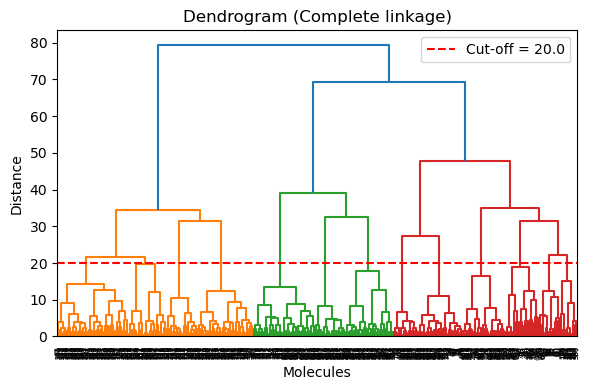

In [54]:

# --- Step 1: Assume you already have your t-SNE reduced data ---
# X_tsne is a numpy array of shape (760, 2)
# Example: X_tsne = np.load("tsne_data.npy")

X = reduced_data_tsne

# --- Step 2: Set cut-off threshold ---
cutoff = 20.0  # adjust based on your dataset

# --- Step 3: Perform complete linkage and plot dendrogram ---
linked = linkage(X, method="complete")

plt.figure(figsize=(6, 4))
dendrogram(linked, truncate_mode="level", p=10)
plt.axhline(y=cutoff, color="red", linestyle="--", label=f"Cut-off = {cutoff}")
plt.title("Dendrogram (Complete linkage)")
plt.xlabel("Molecules")
plt.ylabel("Distance")
plt.legend()
plt.tight_layout()
plt.show()

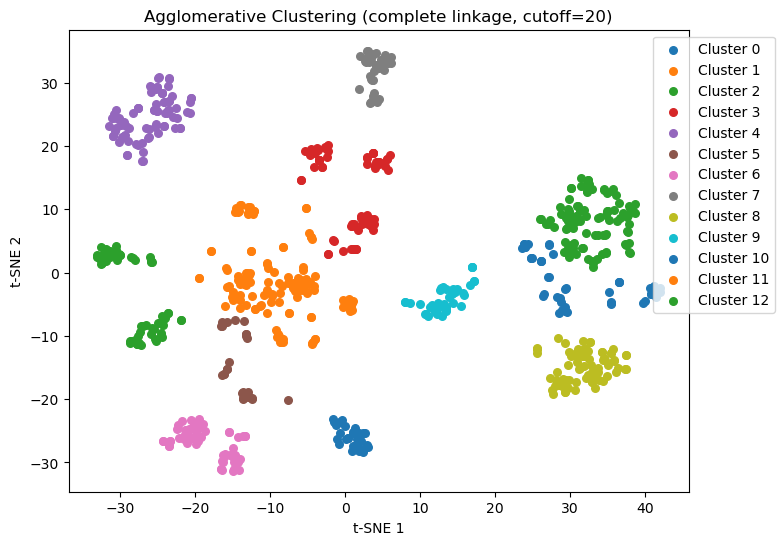

In [51]:
# --- Step 1: Assume you already have your t-SNE reduced data ---
# X_tsne is a numpy array of shape (760, 2)
# Example: X_tsne = np.load("tsne_data.npy")

X = reduced_data_tsne

# --- Step 2: Perform Agglomerative Clustering with distance cut-off ---
hc = AgglomerativeClustering(
    linkage="complete",
    distance_threshold=20,   # cut-off chosen from dendrogram
    n_clusters=None          # must be None when using distance_threshold
)

labels = hc.fit_predict(X)

# --- Step 3: Visualize clusters in t-SNE space ---
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X[labels == cluster, 0],
        X[labels == cluster, 1],
        label=f"Cluster {cluster}", s=30
    )
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.title("Agglomerative Clustering (complete linkage, cutoff=20)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()
